In [8]:
import backtrader as bt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import alpaca_trade_api as tradeapi

class RSIStrategy(bt.Strategy):
    params = (
        ('rsi_period', 14),
        ('rsi_oversold', 30),
        ('rsi_overbought', 70),
    )

    def __init__(self):
        self.rsi = bt.indicators.RSI(self.data, period=self.params.rsi_period)

    def next(self):
        if self.rsi < self.params.rsi_oversold:
            if not self.position:
                self.buy()

        if self.rsi > self.params.rsi_overbought:
            if self.position:
                self.sell()

# Alpaca API credentials
alpaca_api_key = 'PKXC7BYYE65GXGNC5AC7'
alpaca_secret_key = 'vTdR7HBBY1ZLk2Hm0QDbxuhKcj4JRcy5QDFE3Tpk'
alpaca_base_url = 'https://paper-api.alpaca.markets'


# Create Alpaca API client
api = tradeapi.REST(alpaca_api_key, alpaca_secret_key, alpaca_base_url, api_version='v2')

# Get historical price data for a currency pair
SYMBOL = 'AAPL'
INTERVAL = '1D'
start_date = pd.Timestamp('2022-01-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2023-03-01', tz='America/New_York').isoformat()

# historical_data = api.get_barset(symbol, timeframe, start=start_date, end=end_date).df[symbol]
historical_data = api.get_bars(symbol=SYMBOL, timeframe=INTERVAL, start=start_date, end=end_date).df
historical_data.index = pd.to_datetime(historical_data.index)

# Create a data feed
data = bt.feeds.PandasData(dataname=historical_data)

# Initialize and run the backtrader engine
cerebro = bt.Cerebro()
cerebro.addstrategy(RSIStrategy)

# Add data feed to the engine
cerebro.adddata(data)

# Set cash and commission for trading
cerebro.broker.setcash(100000.0)
cerebro.broker.setcommission(commission=0.0)

# Run the backtrader engine
# cerebro.run()

# # Plotting
# cerebro.plot(style='candlestick')

# # Print final portfolio value
# print(f"Final Portfolio Value: {cerebro.broker.getvalue():.2f}")


In [9]:
cerebro.addanalyzer(bt.analyzers.TimeReturn, _name="return")
#cerebro.addanalyzer(BacktraderPlottingLive, address="*", port=8889)
print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())
results = cerebro.run()
strat = results[0]
print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

Starting Portfolio Value: 100000.00
Final Portfolio Value: 100011.85


In [10]:
type(strat)

__main__.RSIStrategy

                           Strategy
-------------------------  ----------
Start Period               2022-01-03
End Period                 2023-03-01
Risk-Free Rate             0.0%
Time in Market             74.0%

Cumulative Return          0.01%
CAGR﹪                     0.01%

Sharpe                     0.22
Prob. Sharpe Ratio         59.33%
Smart Sharpe               0.21
Sortino                    0.32
Smart Sortino              0.31
Sortino/√2                 0.22
Smart Sortino/√2           0.22
Omega                      1.04

Max Drawdown               -0.05%
Longest DD Days            336
Volatility (ann.)          0.05%
Calmar                     0.21
Skew                       0.24
Kurtosis                   1.99

Expected Daily %           0.0%
Expected Monthly %         0.0%
Expected Yearly %          0.01%
Kelly Criterion            2.1%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.0%
Expected Shortfall (cVaR)  -0.0%

Max Consecutive Wins       11
Max Co

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2022-03-30,2022-06-16,2023-03-01,336,-0.048890,-0.046191
2,2022-02-10,2022-03-14,2022-03-29,47,-0.025656,-0.021546
3,2022-02-03,2022-02-07,2022-02-09,6,-0.004179,-0.003449
4,2022-01-26,2022-01-27,2022-01-28,2,-0.000560,-0.000090
5,2022-02-01,2022-02-01,2022-02-02,1,-0.000170,0.000000


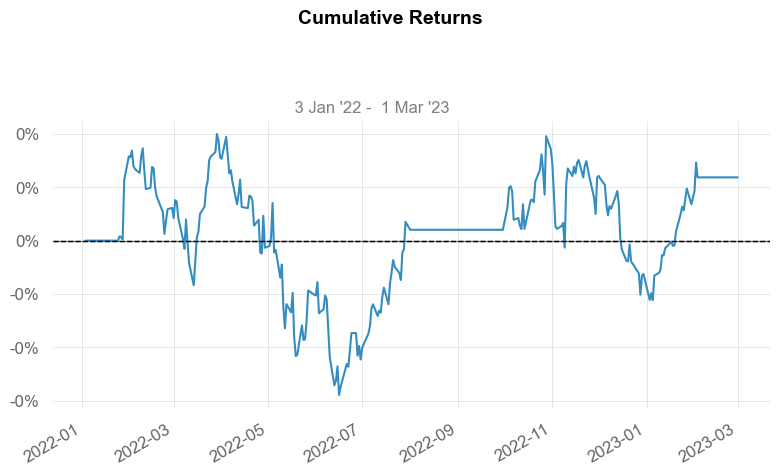

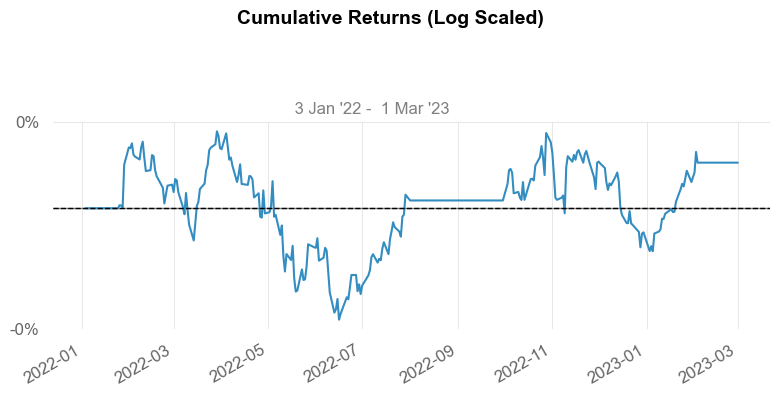

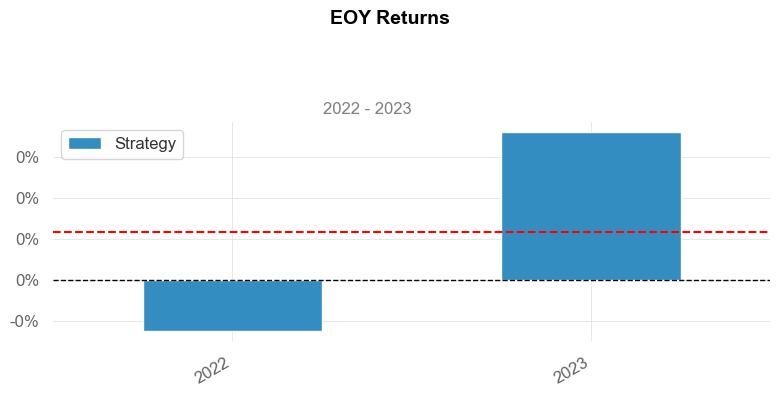

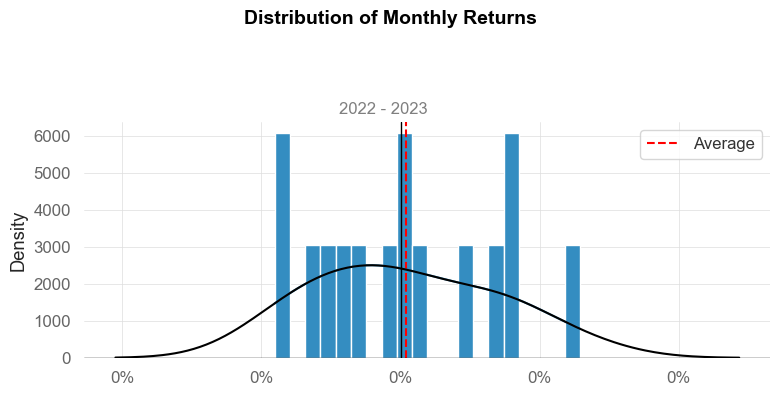

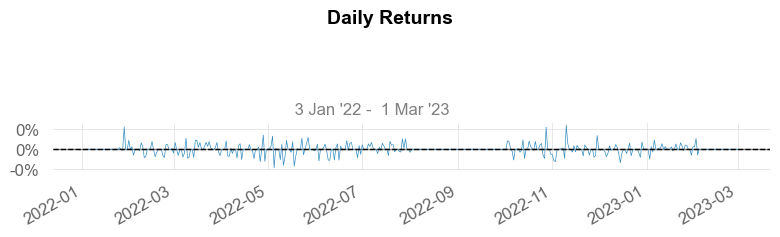

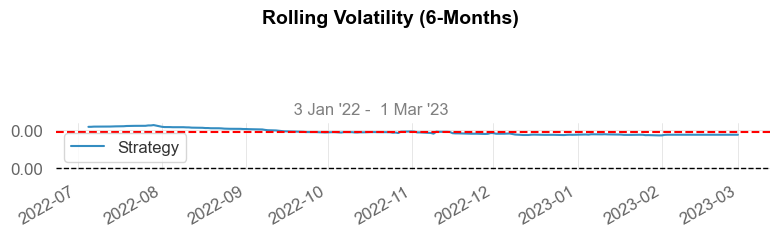

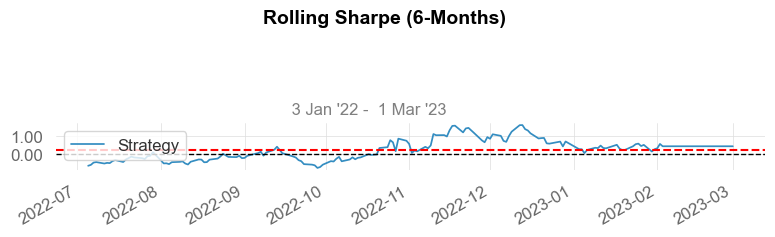

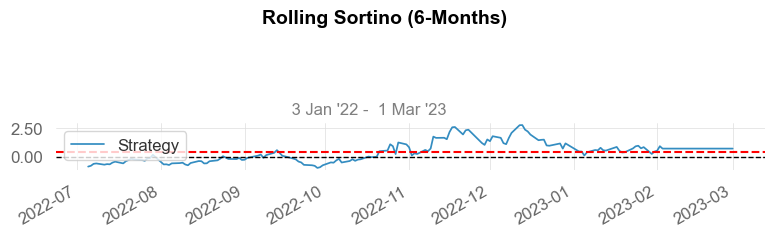

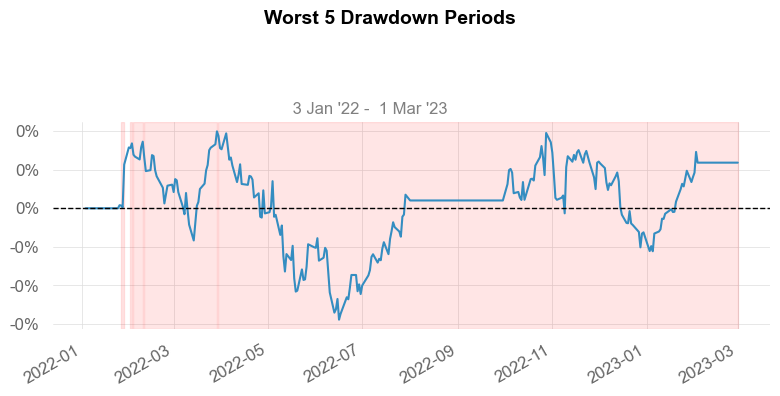

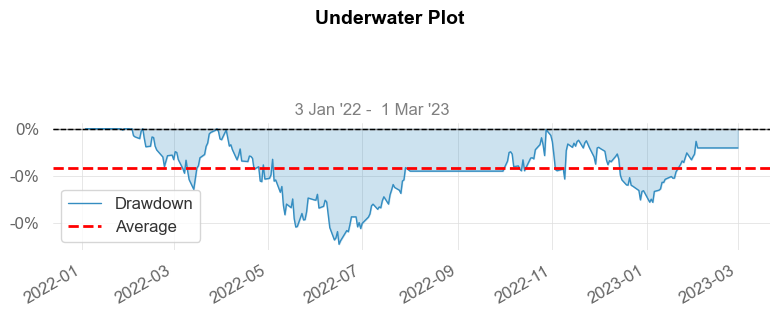

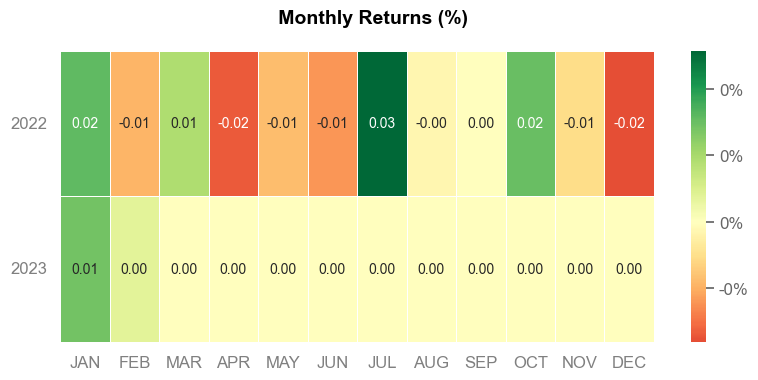

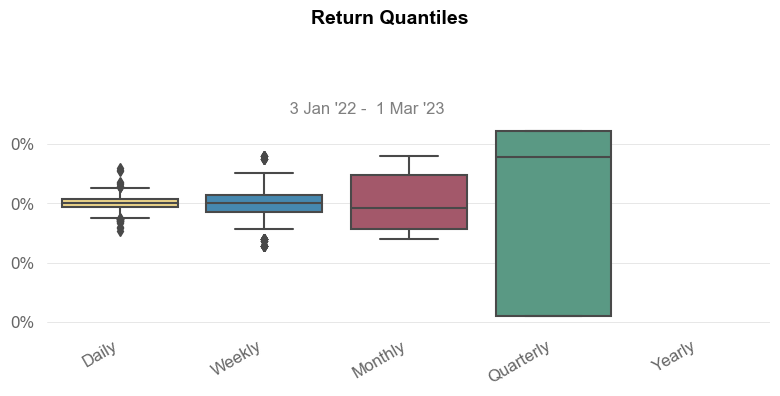

In [11]:
import quantstats as qs
import pandas as pd
strat_return = strat.analyzers.getbyname("return").get_analysis()
strat_return = list(strat_return.items())
idx, values = zip(*strat_return)
strat_return = pd.Series(values, idx)
qs.reports.full(strat_return)

In [12]:
strat_return

2022-01-03    0.0
2022-01-04    0.0
2022-01-05    0.0
2022-01-06    0.0
2022-01-07    0.0
             ... 
2023-02-23    0.0
2023-02-24    0.0
2023-02-27    0.0
2023-02-28    0.0
2023-03-01    0.0
Length: 291, dtype: float64

In [13]:
[f for f in dir(qs.stats) if f[0] != '_']

['adjusted_sortino',
 'autocorr_penalty',
 'avg_loss',
 'avg_return',
 'avg_win',
 'best',
 'cagr',
 'calmar',
 'common_sense_ratio',
 'comp',
 'compare',
 'compsum',
 'conditional_value_at_risk',
 'consecutive_losses',
 'consecutive_wins',
 'cpc_index',
 'cvar',
 'distribution',
 'drawdown_details',
 'expected_return',
 'expected_shortfall',
 'exposure',
 'gain_to_pain_ratio',
 'geometric_mean',
 'ghpr',
 'greeks',
 'implied_volatility',
 'information_ratio',
 'kelly_criterion',
 'kurtosis',
 'max_drawdown',
 'monthly_returns',
 'omega',
 'outlier_loss_ratio',
 'outlier_win_ratio',
 'outliers',
 'payoff_ratio',
 'pct_rank',
 'probabilistic_adjusted_sortino_ratio',
 'probabilistic_ratio',
 'probabilistic_sharpe_ratio',
 'probabilistic_sortino_ratio',
 'profit_factor',
 'profit_ratio',
 'r2',
 'r_squared',
 'rar',
 'recovery_factor',
 'remove_outliers',
 'risk_of_ruin',
 'risk_return_ratio',
 'rolling_greeks',
 'rolling_sharpe',
 'rolling_sortino',
 'rolling_volatility',
 'ror',
 'seren

In [14]:
qs.stats.max_drawdown(strat_return)

-0.0004889023173167972